# Part I - Exploration of Prosper Loan Dataset
## by Solomon T. Adagba


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Preliminary Wrangling</a></li>
<li><a href="#assess">Gather</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#features">Dataset Features</a></li>    
<li><a href="#univariate">Univariate Exploration</a></li>    
<li><a href="#bivariate">Bivariate Exploration</a></li> 
<li><a href="#mulivariate">Mulivariate Exploration</a></li>    
<li><a href="#conclusions">Conclusions And Recommendations</a></li>
<li><a href="#keyinsights">Key Insights for Presentation</a></li>    
</ul>

<a id='intro'></a>
## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


<a id='gather'></a>
## Preliminary Wrangling
In our Preliminary Data Wrangling process we will maitain the statusco of Gathering, Assessin and Cleaning.

In [81]:
# import all packages and set plots to be embedded inline
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 

<a id='assess'></a>
## Gather
>We Load in Prosper Loan dataset and describe its properties below. Our objective is to try and motivate our exploration goals through this section.


In [82]:
loanData = pd.read_csv('prosperLoanData.csv')
loanData

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [83]:
loanData.shape

(113937, 81)

In [84]:
loanData.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [85]:
loanData.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

In [86]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [87]:
loanData.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [88]:
loanData.duplicated().sum()

0

In [89]:
loanData.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [90]:
loanData.notnull().sum()

ListingKey                     113937
ListingNumber                  113937
ListingCreationDate            113937
CreditGrade                     28953
Term                           113937
                                ...  
PercentFunded                  113937
Recommendations                113937
InvestmentFromFriendsCount     113937
InvestmentFromFriendsAmount    113937
Investors                      113937
Length: 81, dtype: int64

In [91]:
loanData['ProsperScore'].isnull().sum()

29084

In [92]:
# Lets get the columns of interest by creating a list an assign to a variable new_columns
new_columns =  [
    'ListingNumber','Term', 'LoanStatus', 'ProsperScore', 'ProsperRating (numeric)', 'Occupation', 'EmploymentStatus',
    'EmploymentStatusDuration', 'IsBorrowerHomeowner','StatedMonthlyIncome', 'AvailableBankcardCredit', 'IncomeVerifiable',
    'LoanOriginationDate', 'TotalProsperLoans','Recommendations', 'MonthlyLoanPayment', 'OnTimeProsperPayments'
]

In [93]:
# Next we turn this list into a datafram
loan_df = loanData[new_columns]
loan_df.head()

,ListingNumber,Term,LoanStatus,ProsperScore,ProsperRating (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,AvailableBankcardCredit,IncomeVerifiable,LoanOriginationDate,TotalProsperLoans,Recommendations,MonthlyLoanPayment,OnTimeProsperPayments
0,193129,36,Completed,NaN,NaN,Other,Self-employed,2.0,True,3083.333333,1500.0,True,2007-09-12 00:00:00,NaN,0,330.43,NaN
1,1209647,36,Current,7.0,6.0,Professional,Employed,44.0,False,6125.000000,10266.0,True,2014-03-03 00:00:00,NaN,0,318.93,NaN
2,81716,36,Completed,NaN,NaN,Other,Not available,NaN,False,2083.333333,NaN,True,2007-01-17 00:00:00,NaN,0,123.32,NaN
3,658116,36,Current,9.0,6.0,Skilled Labor,Employed,113.0,True,2875.000000,30754.0,True,2012-11-01 00:00:00,NaN,0,321.45,NaN
4,909464,36,Current,4.0,3.0,Executive,Employed,44.0,True,9583.333333,695.0,True,2013-09-20 00:00:00,1.0,0,563.97,11.0


In [94]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingNumber             113937 non-null  int64  
 1   Term                      113937 non-null  int64  
 2   LoanStatus                113937 non-null  object 
 3   ProsperScore              84853 non-null   float64
 4   ProsperRating (numeric)   84853 non-null   float64
 5   Occupation                110349 non-null  object 
 6   EmploymentStatus          111682 non-null  object 
 7   EmploymentStatusDuration  106312 non-null  float64
 8   IsBorrowerHomeowner       113937 non-null  bool   
 9   StatedMonthlyIncome       113937 non-null  float64
 10  AvailableBankcardCredit   106393 non-null  float64
 11  IncomeVerifiable          113937 non-null  bool   
 12  LoanOriginationDate       113937 non-null  object 
 13  TotalProsperLoans         22085 non-null   f

In [95]:
loan_df.dtypes

ListingNumber                 int64
Term                          int64
LoanStatus                   object
ProsperScore                float64
ProsperRating (numeric)     float64
Occupation                   object
EmploymentStatus             object
EmploymentStatusDuration    float64
IsBorrowerHomeowner            bool
StatedMonthlyIncome         float64
AvailableBankcardCredit     float64
IncomeVerifiable               bool
LoanOriginationDate          object
TotalProsperLoans           float64
Recommendations               int64
MonthlyLoanPayment          float64
OnTimeProsperPayments       float64
dtype: object

<a id='clean'></a>
## Issues to clean
> Looking at the data types above, we can see EmploymentStatusDuration should be in Months from the description of the dataset.This should be converted to int as Month cannot be float.

> Again, the LoanOriginationDate is of type object, this should be converted to datetime  

> Rename ProsperRating (numeric) column appropraitely

In [96]:
# Since we have missing values in the column, we will convert fill missing values with 0
loan_df['EmploymentStatusDuration'].astype('Int64').fillna(0)

0           2
1          44
2           0
3         113
4          44
         ... 
113932    246
113933     21
113934     84
113935     94
113936    244
Name: EmploymentStatusDuration, Length: 113937, dtype: Int64

In [97]:
loan_df['EmploymentStatusDuration'] = loan_df['EmploymentStatusDuration'].astype('Int64').fillna(0)

In [98]:
# Check if column is converted to int
loan_df['EmploymentStatusDuration'].dtypes

Int64Dtype()

In [99]:
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

In [100]:
# Check if column is converted to Datetime
loan_df['LoanOriginationDate'].dtypes

dtype('<M8[ns]')

In [101]:
# We now have the data properly converted to all the types we need:
loan_df.dtypes

ListingNumber                        int64
Term                                 int64
LoanStatus                          object
ProsperScore                       float64
ProsperRating (numeric)            float64
Occupation                          object
EmploymentStatus                    object
EmploymentStatusDuration             Int64
IsBorrowerHomeowner                   bool
StatedMonthlyIncome                float64
AvailableBankcardCredit            float64
IncomeVerifiable                      bool
LoanOriginationDate         datetime64[ns]
TotalProsperLoans                  float64
Recommendations                      int64
MonthlyLoanPayment                 float64
OnTimeProsperPayments              float64
dtype: object

In [102]:
# Rename Column ProsperRating (numeric) appropraitely
loan_df.rename(columns = {'ProsperRating (numeric)' : 'ProsperRating'}, inplace = True)
loan_df.head() 

,ListingNumber,Term,LoanStatus,ProsperScore,ProsperRating,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,AvailableBankcardCredit,IncomeVerifiable,LoanOriginationDate,TotalProsperLoans,Recommendations,MonthlyLoanPayment,OnTimeProsperPayments
0,193129,36,Completed,NaN,NaN,Other,Self-employed,2,True,3083.333333,1500.0,True,2007-09-12,NaN,0,330.43,NaN
1,1209647,36,Current,7.0,6.0,Professional,Employed,44,False,6125.000000,10266.0,True,2014-03-03,NaN,0,318.93,NaN
2,81716,36,Completed,NaN,NaN,Other,Not available,0,False,2083.333333,NaN,True,2007-01-17,NaN,0,123.32,NaN
3,658116,36,Current,9.0,6.0,Skilled Labor,Employed,113,True,2875.000000,30754.0,True,2012-11-01,NaN,0,321.45,NaN
4,909464,36,Current,4.0,3.0,Executive,Employed,44,True,9583.333333,695.0,True,2013-09-20,1.0,0,563.97,11.0


In [103]:
# Let look at information about our new dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingNumber             113937 non-null  int64         
 1   Term                      113937 non-null  int64         
 2   LoanStatus                113937 non-null  object        
 3   ProsperScore              84853 non-null   float64       
 4   ProsperRating             84853 non-null   float64       
 5   Occupation                110349 non-null  object        
 6   EmploymentStatus          111682 non-null  object        
 7   EmploymentStatusDuration  113937 non-null  Int64         
 8   IsBorrowerHomeowner       113937 non-null  bool          
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  AvailableBankcardCredit   106393 non-null  float64       
 11  IncomeVerifiable          113937 non-null  bool          
 12  Lo

In [104]:
loan_df.describe()

,ListingNumber,Term,ProsperScore,ProsperRating,EmploymentStatusDuration,StatedMonthlyIncome,AvailableBankcardCredit,TotalProsperLoans,Recommendations,MonthlyLoanPayment,OnTimeProsperPayments
count,1.139370e+05,113937.000000,84853.000000,84853.000000,113937.000000,1.139370e+05,106393.000000,22085.000000,113937.000000,113937.000000,22085.000000
mean,6.278857e+05,40.830248,5.950067,4.072243,89.642188,5.608026e+03,11210.225447,1.421100,0.048027,272.475783,22.271949
std,3.280762e+05,10.436212,2.376501,1.673227,94.369148,7.478497e+03,19818.361309,0.764042,0.332353,192.697812,18.830425
min,4.000000e+00,12.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.009190e+05,36.000000,4.000000,3.000000,19.000000,3.200333e+03,880.000000,1.000000,0.000000,131.620000,9.000000
50%,6.005540e+05,36.000000,6.000000,4.000000,60.000000,4.666667e+03,4100.000000,1.000000,0.000000,217.740000,15.000000
75%,8.926340e+05,36.000000,8.000000,5.000000,130.000000,6.825000e+03,13180.000000,2.000000,0.000000,371.580000,32.000000
max,1.255725e+06,60.000000,11.000000,7.000000,755.000000,1.750003e+06,646285.000000,8.000000,39.000000,2251.510000,141.000000


In [105]:
# We now store the loan_df copy in CSV file with name 'loan_df.csv'
loan_df.to_csv('loan_df.csv')

<a id ='features'></a>
### What is the structure of your dataset?

> In EDA, this is referred to as Understanding the Meta Data! ie‘Data about the Data’. In this dataset, there are 113937 rows and 81 columns(features). No duplicate values, meaning all values are unique. However, there are about 28953 null values in the CreditGrade column. The dataset is numeric data with ordered columns like ProsperRating (numeric) taking numerical values.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the successful outcome of an application for a loan in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I hope that Recommendations will serve as a good factor to obtain a loan: the more recommendations, the higher the chances to get a loan. I also think that EmploymentStatus, IsBorrowerHomeowner, Occupation, and IncomeVerifiable are other good feature to determine the chances of getting a loan.

<a id='univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [106]:
def type_counts(x):
     return x.value_counts()
type_counts(loan_df['Recommendations'])

0     109678
1       3516
2        568
3        108
4         26
5         14
9          6
7          5
6          4
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: Recommendations, dtype: int64

In [107]:
def description(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
base_color = sb.color_palette()[0]

#### Question 

# What Term Dominate the Dataset?

#### Visualization

In [108]:
type_counts(loan_df['Term'])

36    87778
60    24545
12     1614
Name: Term, dtype: int64

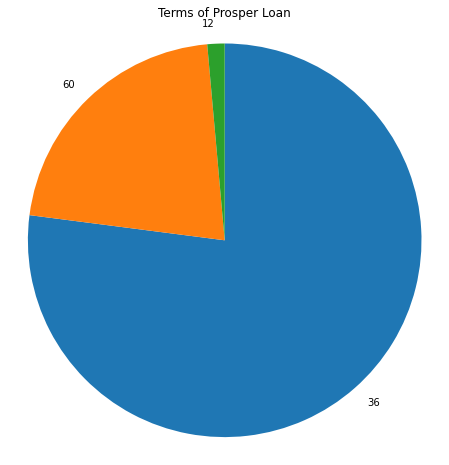

In [109]:
# Let begin by looking at the Terms of Prosper Loan
sorted_counts = loan_df['Term'].value_counts()
plt.figure(figsize=[10,8])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title('Terms of Prosper Loan')
plt.show()

#### Observation
> Most of the loans have a tenure of 36 Months as depict on the Pie Chart Above

#### Question
# Does high Number of recommendations the borrower had at the time the listing was created signify a higher chance of getting a loan?.

#### Visualization

,Recommendations
Recommendations,
0,109678
1,3516
2,568
3,108
4,26
5,14
6,4
7,5
8,3


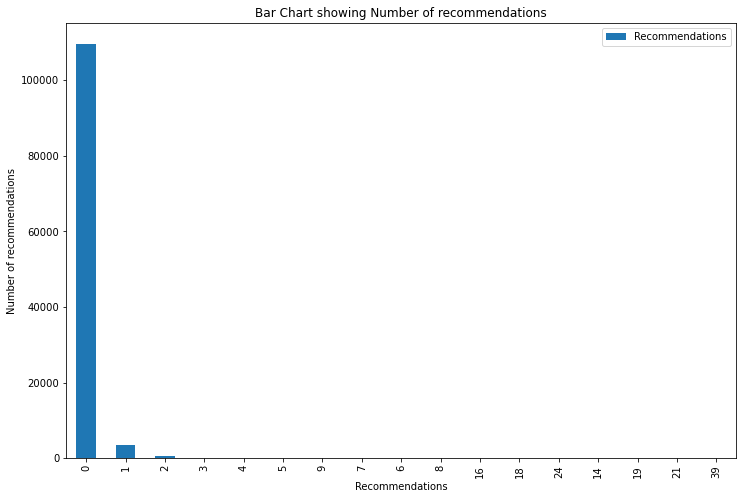

In [110]:
loan_df['Recommendations'].value_counts().plot(kind='bar', figsize=[12, 8])
yL = 'Number of recommendations'
xL = 'Recommendations'
plt.legend()
title= 'Bar Chart showing Number of recommendations'
description(xL, yL, title) 
loan_df.groupby(['Recommendations'])[['Recommendations']].count()

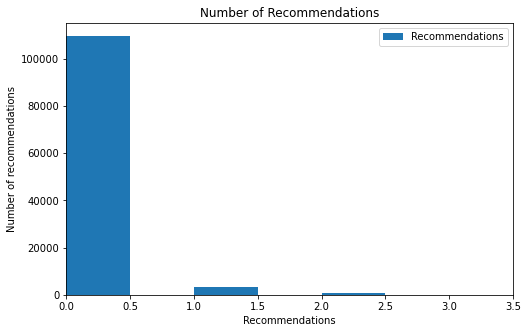

In [111]:
# plotting Recommendations on a standard scale
xLabel = 'Recommendations'
yLabel = 'Count'
title = 'Number of Recommendations'
binsize = 0.5
bins = np.arange(0, loan_df['Recommendations'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'Recommendations', bins = bins)
plt.xlim([0,3.5])
description(xL, yL, title) 
plt.legend(labels=["Recommendations"])
plt.show()

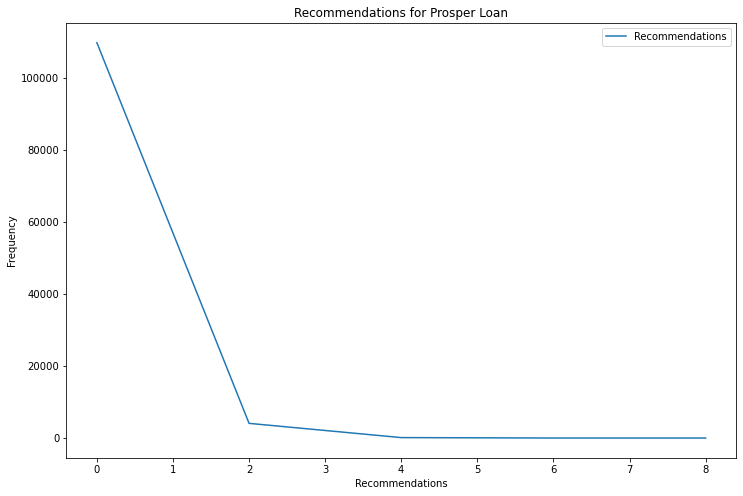

In [134]:
# Lets look at how this looks on a frequency polygon
counts, bins = np.histogram(loan_df.Recommendations, bins=range(-1,10,2))
plt.figure(figsize=[12,8])
plt.plot(bins[:-1]+1, counts)
xL = 'Recommendations'
plt.legend(labels=["Recommendations"])
yL = 'Frequency'
title ='Recommendations for Prosper Loan';
description(xL, yL, title)

#### Observation
> From the Charts above, we observe that 0 account for the highest number of Recommendation. This signifies that having a high number of Recommendation does not guarantee getting a loan. Other factors could have been considered.

#### Question
# Does one's status of employment affects the chance of getting a loan from Prosper?

#### Visualization

In [113]:
#Lets begin by using the count function to summarize the EmploymentStatus column
type_counts(loan_df['EmploymentStatus'])

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

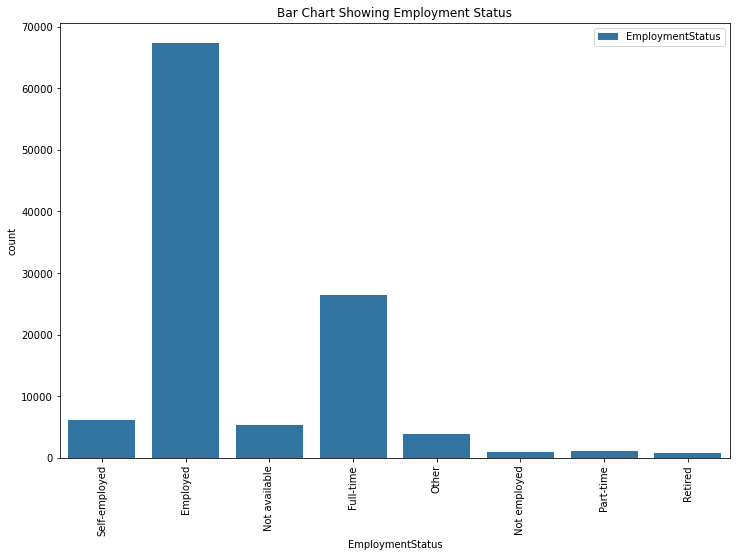

In [114]:
# We now plot this on a bar chart
plt.figure(figsize=[12, 8])
plt.title('Bar Chart Showing Employment Status')
plt.xticks(rotation=90)
sb.countplot(data = loan_df, x = 'EmploymentStatus', color = base_color);
plt.legend(labels=["EmploymentStatus"]);

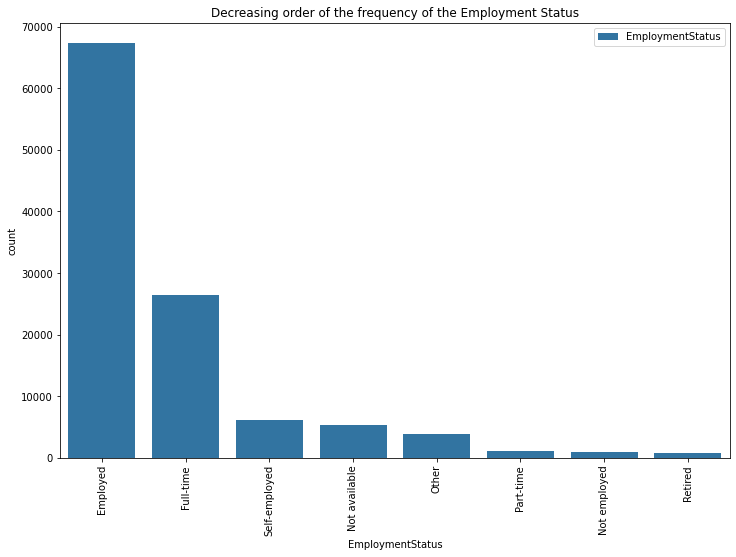

In [115]:
# Ploting the bar chart in the decreasing order of the frequency of the `EmploymentStatus`
plt.figure(figsize=[12, 8])
freq = type_counts(loan_df['EmploymentStatus'])
# Get the indexes of the Series
gen_order = freq.index
plt.title('Decreasing order of the frequency of the Employment Status')
sb.countplot(data=loan_df, x='EmploymentStatus', color=base_color, order=gen_order);
plt.legend(labels=["EmploymentStatus"])
plt.xticks(rotation=90);

#### Observations
> The Chart above shows that over 60,000 are employed. This is a good indication that Proper consider mostly employed people for their loan. Its common to note that their reason for this could easily be that only people with jobs can repay their loan.

> The least are those who are not employed and retired as indicated on the Chart. These cateory of people stands the lowest chance of getting Proper's loan.  

#### Question
# What is the Distribution of Employment Status?

In [116]:
type_counts(loan_df['EmploymentStatusDuration'])

0      9159
4      1186
1      1177
3      1174
2      1153
       ... 
632       1
649       1
678       1
634       1
589       1
Name: EmploymentStatusDuration, Length: 605, dtype: Int64

#### Visualization

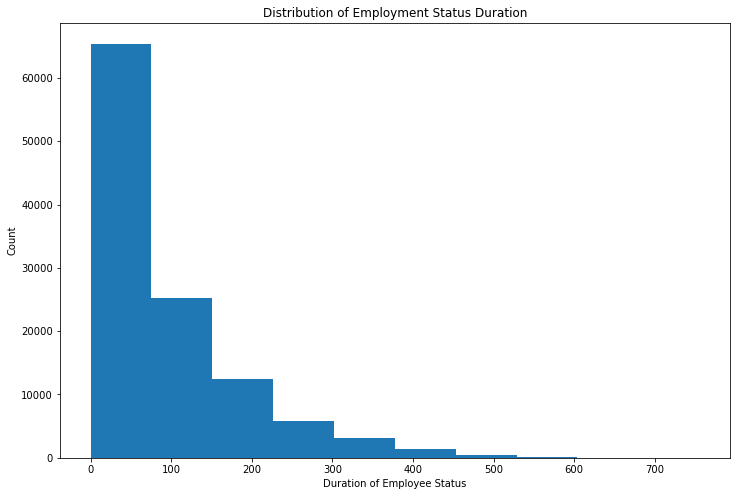

In [117]:
plt.figure(figsize=[12,8])
plt.hist(data = loan_df, x = 'EmploymentStatusDuration');
xL = 'Duration of Employee Status'
yL = 'Count'
title = 'Distribution of Employment Status Duration'
description(xL, yL, title)
plt.show()

#### Observations
> The histogram above shows how frequently duration of Employee status falls into each particular bin. The height of each bar represents the number of values in the data set on the y-axis that fall within a particular bin. The y-axis is labeled as "count" , the numbers along the y-axis tend to be discrete positive integers.

> The Chart above shows that the distribution of the data is right skewed as it has a “tail” on the right side of the distribution. This type of distribution is also called “positively” skewed. We observed that 0 duration is over 60,000. A duration of 100 followed with a frequency of 20,000 with the least been 600 duration. In summary, most borrowers duration of Employee status is over 20,000.
 

#### Question
# Does Borrowers who are House owners have a better chance of getting a loan?

#### Visualization

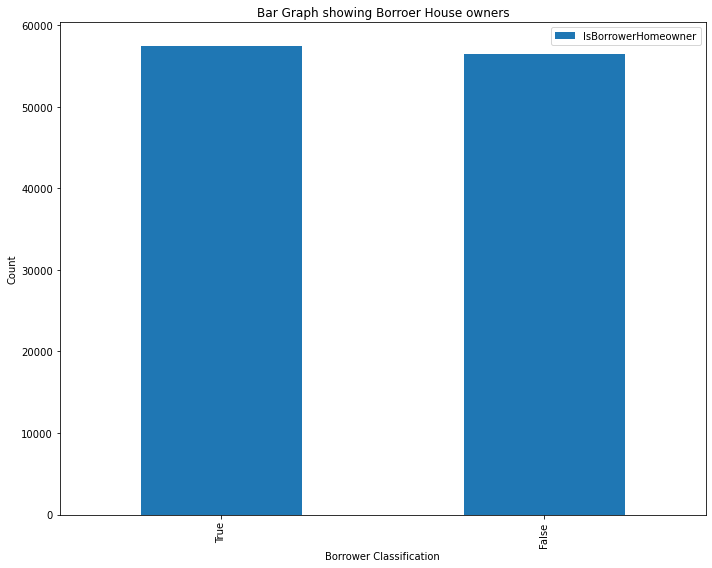

In [118]:
# Again lets look at the count of this feature by using our function type_counts()
plt.figure(figsize=[10,8])
type_counts(loan_df['IsBorrowerHomeowner']).plot(kind = 'bar')
title = 'Bar Graph showing Borroer House owners'
yL = 'Count'
xL = 'Borrower Classification'
plt.legend(fontsize=10)
description(xL, yL, title)
plt.tight_layout()
plt.show()

#### Obervation 
> From the above we can see that the data is evenly divided into true and false, this implies that this feature is not realistic in dertermning if a borrower will be giving a loan.

#### Question
# Does Borrowers whose  Income is Verifiable more likely to be giving loan?

#### Visualization

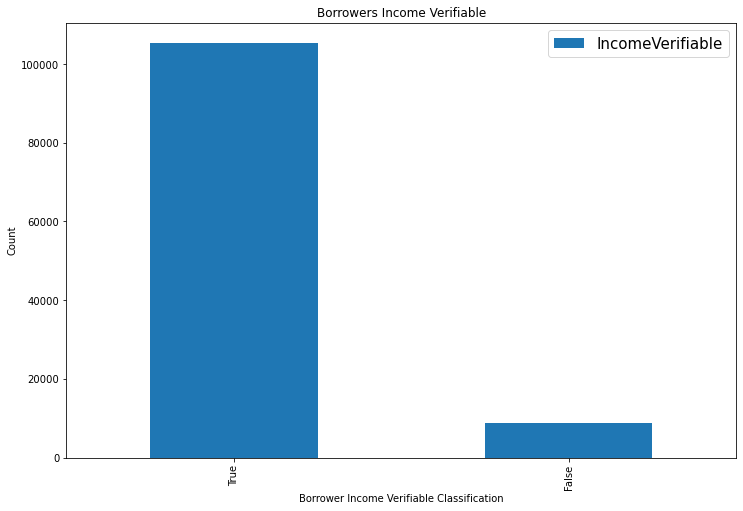

In [119]:
plt.figure(figsize=[12,8])
type_counts(loan_df['IncomeVerifiable']).plot(kind = 'bar')
title = 'Borrowers Income Verifiable'
yL = 'Count'
xL = 'Borrower Income Verifiable Classification'
plt.legend(fontsize=15)
description(xL, yL, title)
plt.show()

#### Observation
> Clarely we can see that Borrowers whose income is verifiable stands a better chance of getting Prosper loan compared to those who are not verified.

#### Question
# What Category of Occupation Have a better Chance of Getting Prosper Loan?

In [120]:
# Again Lets call out type_count function into action
type_counts(loan_df['Occupation'])

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

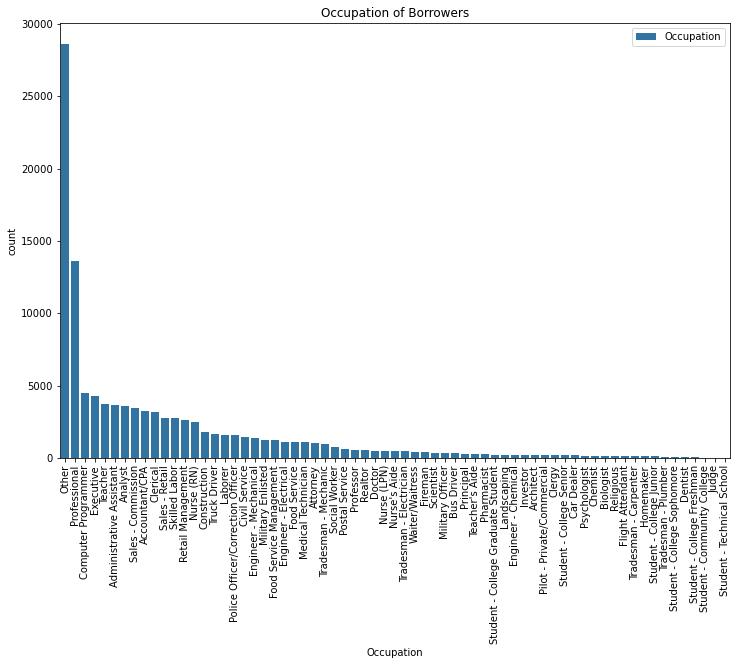

In [121]:
freq = loan_df['Occupation'].value_counts()
plt.figure(figsize=(12,8))
gen_order = freq.index
plt.title('Occupation of Borrowers')
sb.countplot(data=loan_df, x='Occupation', color=base_color, order=gen_order);
plt.legend(labels=["Occupation"])
plt.xticks(rotation=90);

#### Observation
> Surprisingly, Others in the Category of Occupation stands a better chance of getting Prosper Loan with a count or frequency of 28000. Another group is Proffessional with a frequency of 14000. Computer Programmer-Lucky we, have a frequncy of 4000, indicating a good chance to get prosper loan as a Computer Programmer. The Chart shows that Student stand the least chance of getting a loan from Prosper. 

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> The first step in performing our bivariate analysis between variables of interest would be to calculate correlations between them. To achieve this, we use corr function to construct the correlation matrix.

#### Question
# Is there any Relatioship between Employment Status Duration and Recommendations?

In [122]:
# Lets begin by getting our numerical variables
num_var = ['EmploymentStatusDuration','Recommendations']

In [123]:
loan_df[['EmploymentStatusDuration','Recommendations']].corr()

,EmploymentStatusDuration,Recommendations
EmploymentStatusDuration,1.000000,-0.028514
Recommendations,-0.028514,1.000000


#### Visualization

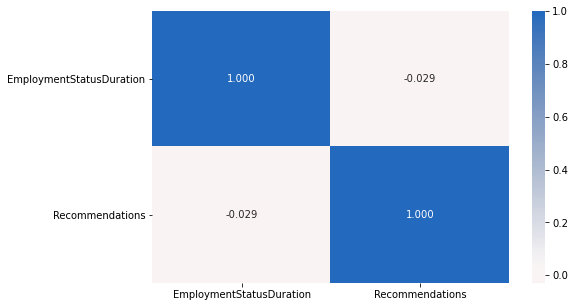

In [124]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

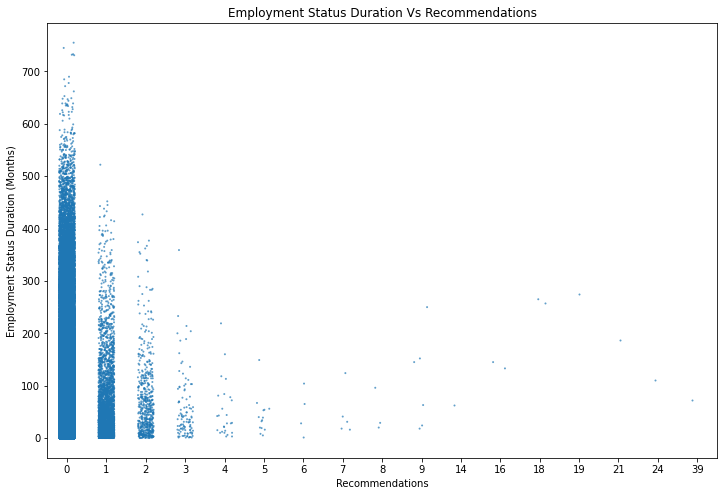

In [125]:
plt.figure(figsize = [12, 8])
sb.stripplot(data =loan_df, x="Recommendations", y="EmploymentStatusDuration", color=base_color, jitter=0.2, size=2, alpha=0.7)
xL = 'Recommendations'
yL = 'Employment Status Duration (Months)'
title = 'Employment Status Duration Vs Recommendations'
description(xL, yL, title)
plt.show()

#### Observation
> As to our graph above, correlation of -0.039 between EmploymentStatusDuration and Recommendations is very low, I would infer that these features are hardly related in the linear sense.
> We can also see from the scatter plot how right-skewed the data is. Again we observed that the higher the EmploymentStatusDuration, the lower the Recommendations indicating a negetive relationship.

#### Question
# What is the Relationship between Employment Status Duration and Employment Status?

#### Visualization

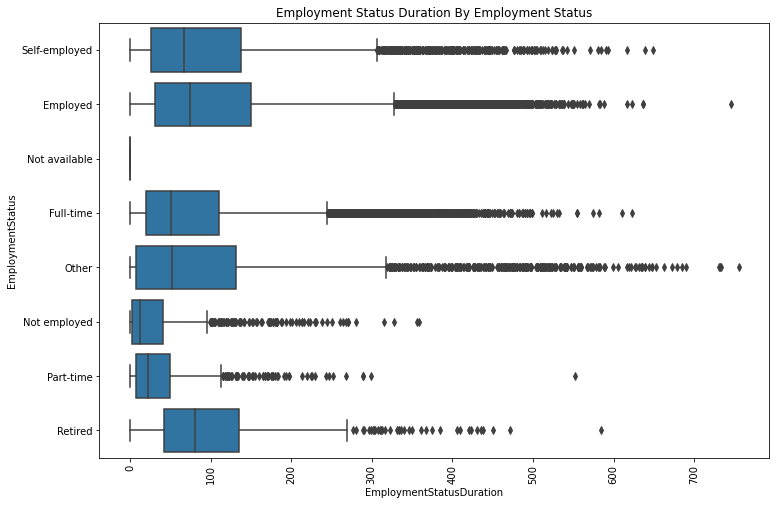

In [126]:
# Let look at the relationship between EmploymentStatus and EmploymentStatusDuration
plt.figure(figsize = [12, 8])
#loan_df.boxplot(column='EmploymentStatusDuration', by='EmploymentStatus')
sb.boxplot(data=loan_df, x='EmploymentStatusDuration', y='EmploymentStatus', color=base_color).set(title='Employment Status Duration By Employment Status')
plt.xticks(rotation=90)
plt.show()

#### Observation
> The box plot above shows Employment Status Duration for Prosper Loan, grouped together by employment status. From this plot, the medians are well separated from the median for each category with Employed, Retired, and self-employed being higher at an astonishing 90.

>Also, there appears to be a slight decrease in median of Employment Status Duration in Not-Employed and part-time. Chart show employment status with outlier duration counts in almost all the categories.

In [127]:
loan_df['MonthlyLoanPayment'].mean()

272.47578310823104

#### Question

# What is the Average Monthly Loan Payment of Borrowers whose Income is Verifiable?

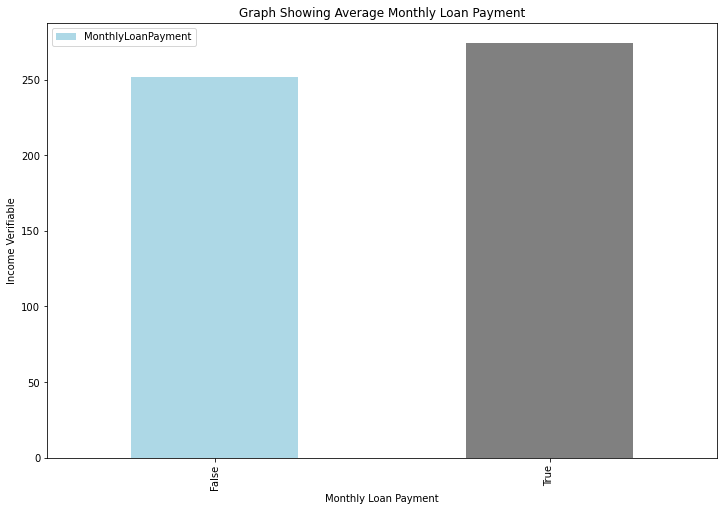

In [128]:
loan_df.groupby('IncomeVerifiable')['MonthlyLoanPayment'].mean().plot(kind = 'bar', color =['lightblue','gray'], figsize=(12,8))
xL = "Monthly Loan Payment"
yL = "Income Verifiable"
title = "Graph Showing Average Monthly Loan Payment"
plt.legend()
description(xL, yL, title)
plt.show()

#### Observation
> Here we are interested in comparing our features of interest with another feature in the dataset, and we have consider the MonthlyLoanPayment feature to further justify our ealier claim that those whose income is verifiable stands a better chance of getting Prosper Loan.

>Hence, we can see from the chart above that the Average MonthlyLoanPayment of Borrowers whose income is verifiable is higher than those whose income is not veriable, with an Average score of 272.47 to 250 of those whose income is not. veriable.

### Lets try to look at possible relationship with other features in the dataset by plotting a heatmap

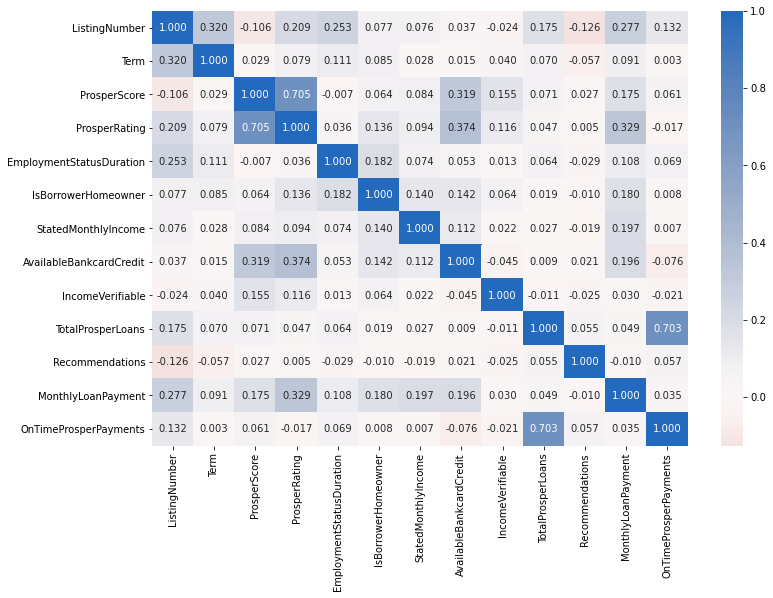

In [129]:
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

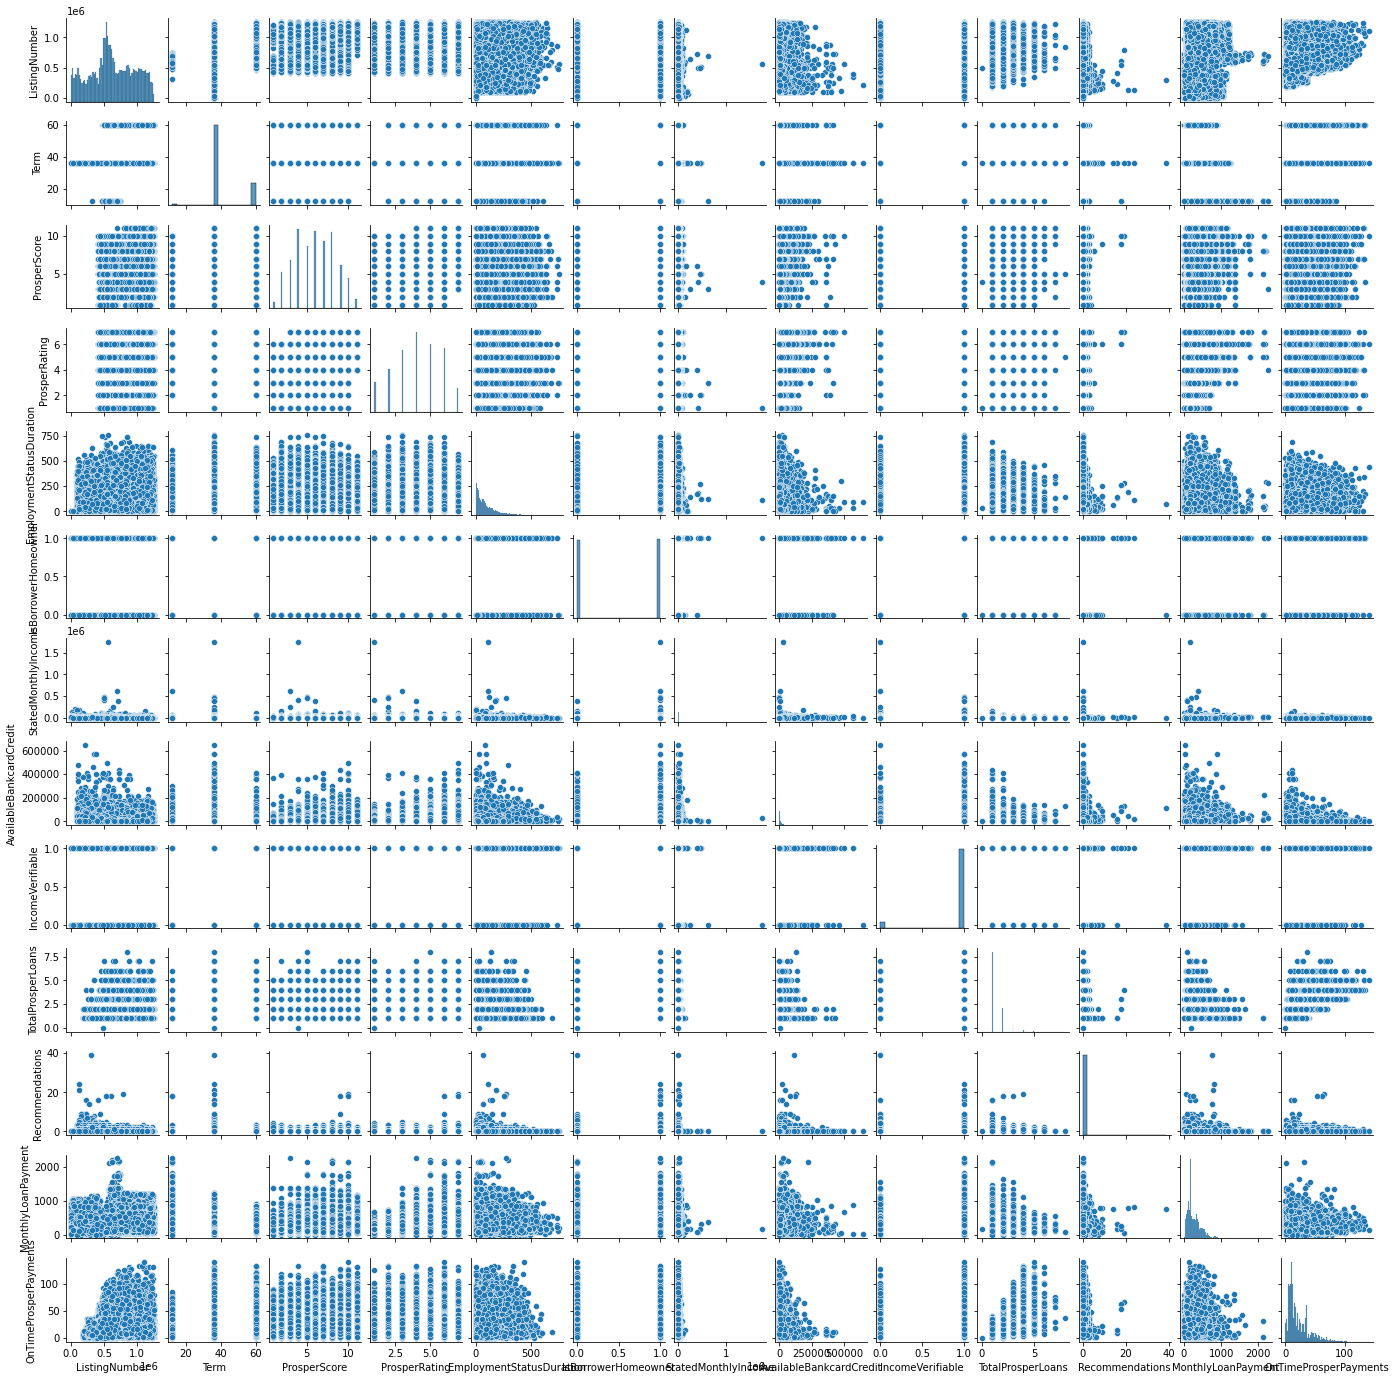

In [130]:
sb.pairplot(loan_df, height=1.5)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We looked at the relationship between EmploymentStatusDuration and Recommendations and found it to be -0.039 indicating a poor relationship. We also observed from the scatter plot that the data was right-skewed. Again we observed that the higher the EmploymentStatusDuration, the lower the Recommendations,indicating a negetive relationship.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the Heat Map and seaborn pair plot, we observe that there is a positive correlation of 0.7 between ProsperRating and ProsperScore, which means that as the rating goes up so does the score. We also noticed a strong correlation o.7 between TotalProsperLoans and OnTimeProsperPayments. Slight correlation of 0.3 is observed between AvailableBankcardCredit and rosperRating and ProsperScore. MonthlyLoanPayment and ProsperRating have a correlation of 0.3. A negetive correlation of -0.07 is observed between OnTimeProsperPayments and AvailableBankcardCredit.

<a id='mulivariate'></a>
# Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Question
# Which Borrower's who is Home owner has the Highest Bank Credit?

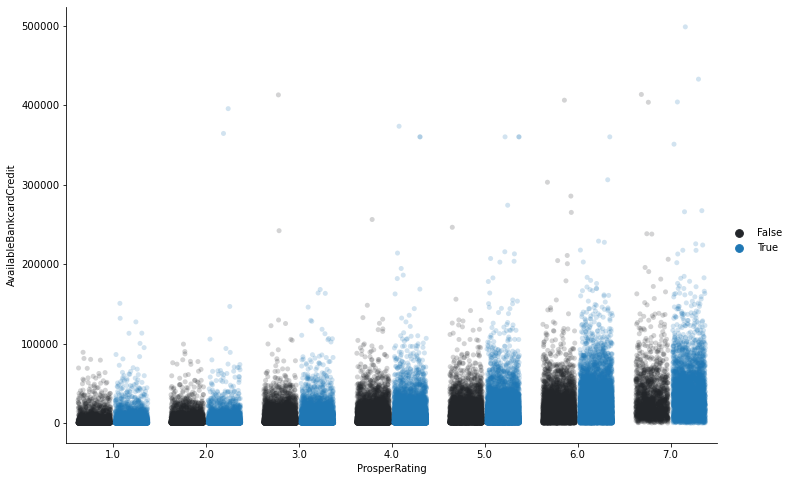

In [131]:
g = sb.FacetGrid(data=loan_df)
g.map(sb.stripplot,'ProsperRating','AvailableBankcardCredit','IsBorrowerHomeowner', dodge =True, jitter =.35, 
      alpha=.2)
g.fig.set_size_inches(14,8);
g.add_legend();

#### Observation
>From the above chart, we are interested in knowing how Borrowers who are house owners are rated, and their corresponding Available Bank Card Credit. We can see that a Borrowers who is a home owner recieved the highest rating of 7, and has an Available Bank Card Credit of 500,000 compared to Borrowers who are not with an Available Bank Card Credit 400,000. This again goes further to show how prosper demonstrate more interest in Borrowers who are home owners.

#### Question

# What category of Employment Status had their income verified the most?

#### Visualization

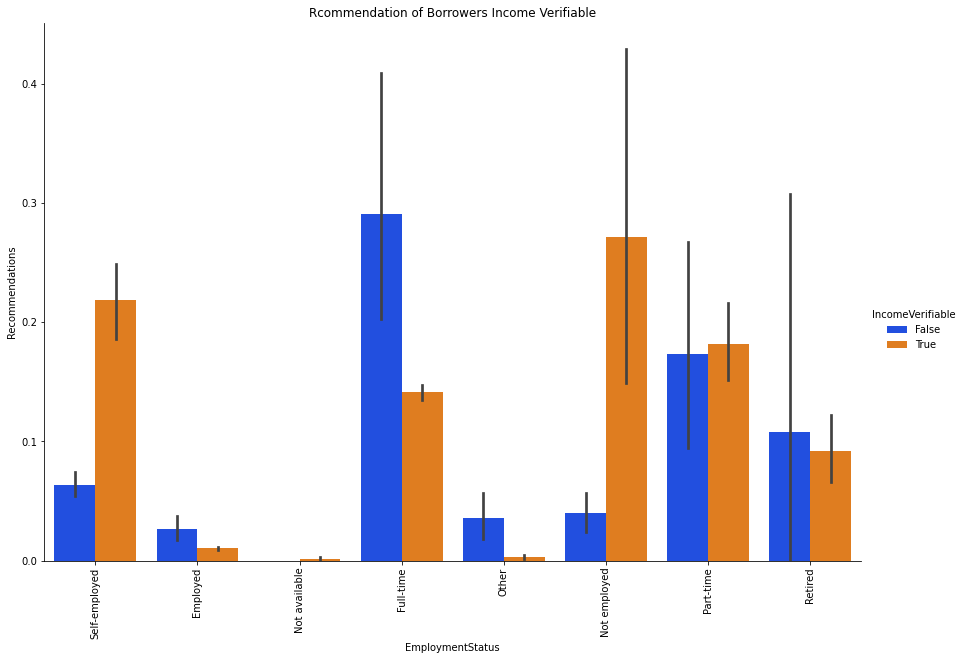

In [132]:
# Using the seaborn library we plot a catplot using two categorical and one numeric values in our dataset.
sb.catplot(
    x='EmploymentStatus', 
    y='Recommendations', 
    data=loan_df,
    palette='bright',
    kind='bar',
    hue='IncomeVerifiable', height=8, aspect=12/8)
plt.title('Rcommendation of Borrowers Income Verifiable')
plt.xticks(rotation = 90);

#### Observation
> From the visual above, we can see that Borrowers who are Not-employed had their income verified the most. Followed by those who are self-employed. We can also see that for Borrowers who are employed there is little verification of income. These analysis goes further to justify our earlier claim that Prosper are more interested Borrowers who are employed, hence will definately verify the income of those who are not employed.

#### Question

# What category of occupation are/is houseowner with the highest Employment Status Duration?

#### Visualization

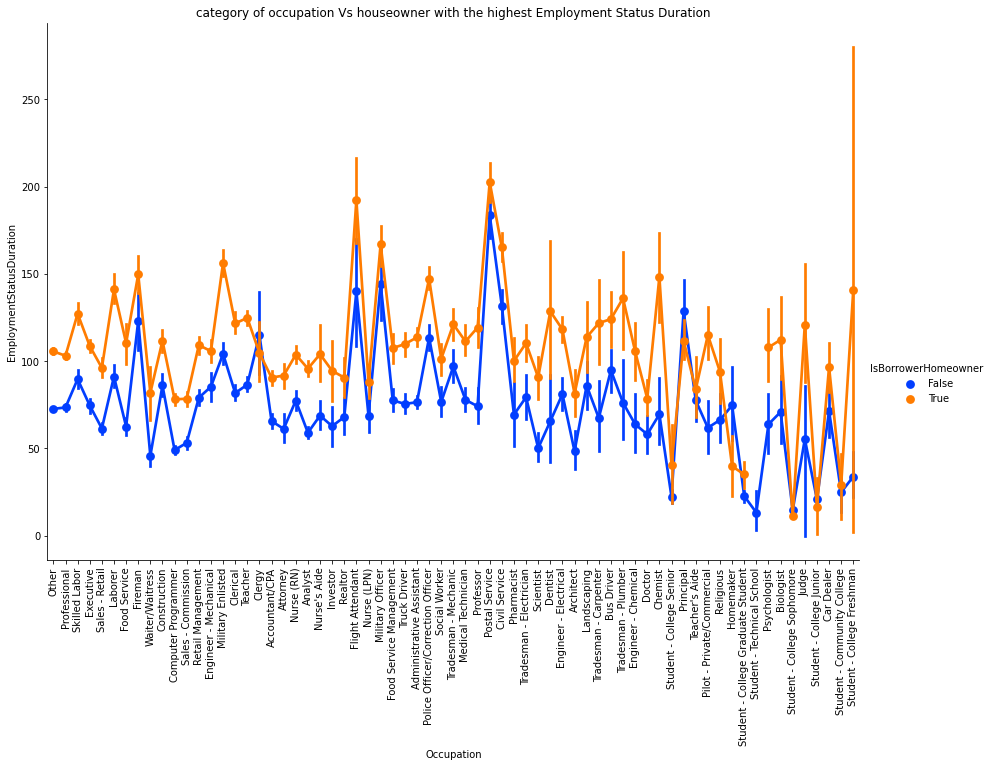

In [133]:
sb.catplot(
    x='Occupation', 
    y='EmploymentStatusDuration', 
    data=loan_df, 
    palette='bright',
    kind='point', 
    hue='IsBorrowerHomeowner', height=8, aspect=12/8)
plt.title('category of occupation Vs houseowner with the highest Employment Status Duration')
plt.xticks(rotation=90);

#### Observation

> The graph above shows that Professor who are home ownners have a longer duration in terms of employment status. The minimum been student-College Sophomore.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can see that a Borrowers who is a home owner recieved the highest rating of 7, and has an Available Bank Card Credit of 500,000 compared to Borrowers who are not with an Available Bank Card Credit 400,000. This again goes further to show how prosper demonstrate more interest in Borrowers who are home owners.

> Borrowers who are Not-employed had their income verified the most. Followed by those who are self-employed. We can also see that for Borrowers who are employed there is little verification of their income. These analysis goes further to justify our earlier claim that Prosper are more interested in Borrowers who are employed, hence will definately verify the income of those who are not employed.

### Were there any interesting or surprising interactions between features?

> Its quite interesting to know that Professor who are home ownners have a longer duration in terms of employment status. The minimum been student-College Sophomore.

<a id='conclusions'></a>
## Conclusions And Recommendation
>In this analysis of Prosper Loan Dataset to determine which categories of Borrowers have a better chance of been granted Prosper loan, the following major findings were made:

> Most of the loans have a tenure of 36 Months. 

> 0 accounted for the highest number of Recommendation.

> Over 60,000 of Borrowers were employed with the least been those who are not employed and retired.

> Surprisingly, Others in the Category had a count or frequency of 28000. Another group was Proffessional with a frequency of 14000. 

> Again we observed that the higher the EmploymentStatusDuration, the lower the Recommendations. 

> The Average MonthlyLoanPayment of Borrowers whose income was verifiable was higher than those whose income was not veriable, with an Average score of 272.47 to 250 of those whose income is not.

> In the cause of our exploratory process, the following changes were made to the datase:

> i. Looking at the data type of EmploymentStatusDuration, we can felt that EmploymentStatusDuration should be in Months from the description of the dataset.Thus, we converted it to int as Month cannot be float.

> ii. Again, the LoanOriginationDate was of type object, we converted to datetime.

> iii. Finally we Rename ProsperRating (numeric) column appropraitely, and created a subset of the dataset called loan_df for our analysis.

<a id='keyinsights'></a>
## Key Insights for Presentation

> 0 accounted for the highest number of Recommendationhis. This signifies that having a high number of Recommendation does not guarantee getting a loan. Other factors could have been considered.

> over 60,000 Borrowers are employed. This is a good indication that Proper consider mostly employed people for their loan. 
  Its common to note that their reason for this could easily be that only people with jobs can repay their loan.
  
> Borrowers whose income is verifiable stands a better chance of getting Prosper loan compared to those who are not verified.

> Surprisingly, Others in the Category of Occupation stands a better chance of getting Prosper Loan with a count or frequency of 28000. Another group is Proffessional with a frequency of 14000. Computer Programmer-Lucky we, have a frequncy of 4000, indicating a good chance to get prosper loan as a Computer Programmer. Student had the least chance of getting a loan from Prosper.